In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
t_data=pd.read_excel("temp.xlsx")

x=t_data.T1+t_data.T2
ct=np.polyfit(x,t_data.UT,3)
print(ct)

[-7.28438228e-09 -2.90646853e-05  4.77105186e-02  3.84100044e+01]


In [52]:
def get_UT_k(x):
    return (x**3*ct[0]+x**2*ct[1]+x*ct[2]+ct[3])*1e-3+0.011

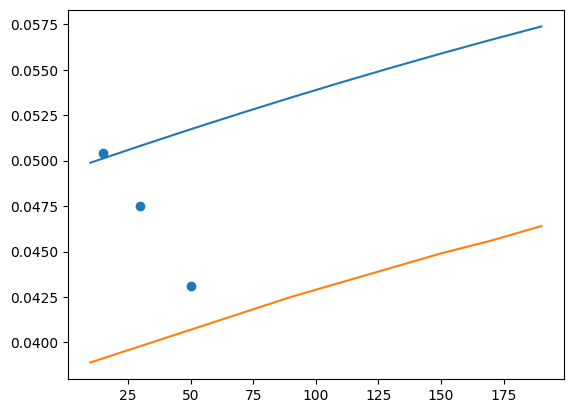

In [112]:
plt.plot(x,get_UT_k(x))
plt.scatter([15,30,50],[get_UT_k(15)+0.0003,get_UT_k(30)-0.0033,get_UT_k(50)-0.0086])
plt.plot(x,t_data.UT*1e-3)

In [53]:
data=pd.read_excel("data.xlsx")

In [54]:
d1=data[data.Tw==15]
d2=data[data.Tw==30]
d3=data[data.Tw==50]
d1,d2,d3

(     U0  Tw    P     Ui    rUi
 0  0.03  15  4.0  0.128  0.098
 1  0.03  15  3.5  0.110  0.080
 2  0.03  15  3.0  0.088  0.058
 3  0.03  15  2.5  0.070  0.040
 4  0.03  15  2.0  0.053  0.023,
       U0  Tw    P     Ui    rUi
 5  0.038  30  4.0  0.121  0.083
 6  0.038  30  3.5  0.102  0.064
 7  0.038  30  3.0  0.085  0.047
 8  0.038  30  2.5  0.069  0.031
 9  0.038  30  2.0  0.053  0.015,
        U0  Tw    P     Ui    rUi
 10  0.053  50  4.0  0.110  0.057
 11  0.053  50  3.5  0.096  0.043
 12  0.053  50  3.0  0.081  0.028
 13  0.053  50  2.5  0.069  0.016
 14  0.053  50  2.0  0.055  0.002)

In [103]:
c1=np.polyfit(d1.P,d1.rUi/(get_UT_k(15)+0.0003),1)
c2=np.polyfit(d2.P,d2.rUi/(get_UT_k(30)-0.0033),1)
c3=np.polyfit(d3.P,d3.rUi/(get_UT_k(50)-0.0086),1)
c1,c2,c3

(array([ 0.75368266, -1.07498948]),
 array([ 0.71135483, -1.12385645]),
 array([ 0.63540714, -1.2290722 ]))

In [104]:
l=np.linspace(2,4,5)

In [105]:
l

array([2. , 2.5, 3. , 3.5, 4. ])

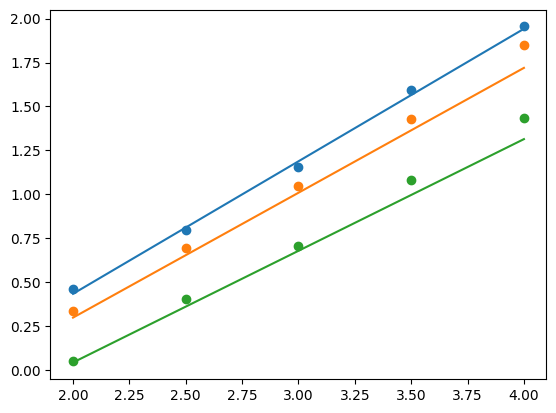

In [106]:
#plt.plot(l,l*c1[0]+c1[1])
plt.scatter(d1.P,d1.rUi/get_UT_k(15))
plt.plot(l,l*7.54288043e-01 +c1[1])
#plt.plot(l,l*c2[0]+c2[1])
plt.scatter(d1.P,d2.rUi/(get_UT_k(30)-0.006))
plt.plot(l,l*7.10876206e-01 +c2[1])
#plt.plot(l,l*c3[0]+c3[1])
plt.scatter(d1.P,d3.rUi/(get_UT_k(50)-0.012))
plt.plot(l,l*6.35785460e-01 +c3[1])

In [107]:
print(c1,c2,c3)
mu=np.array([c1[0],c2[0],c3[0]])/100000
T=np.array([15,30,60])+273
T

[ 0.75368266 -1.07498948] [ 0.71135483 -1.12385645] [ 0.63540714 -1.2290722 ]


array([288, 303, 333])

[7.53682662e-06 7.11354833e-06 6.35407139e-06] [7.54095617e-06 7.10703138e-06 6.35645879e-06]


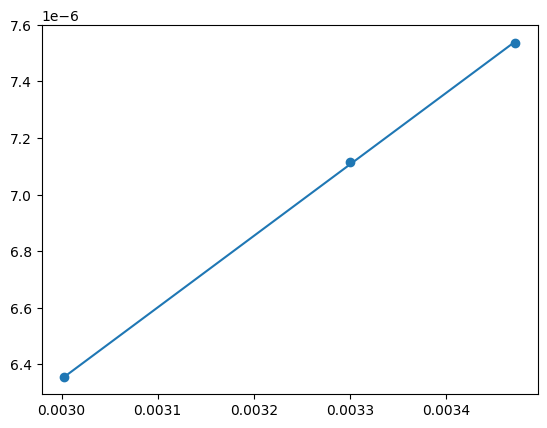

In [109]:
[an,bn]=np.polyfit(1/T,mu,1)
plt.scatter(1/T,mu)
#an,bn=np.float64(0.0025255270400855257),np.float64(-1.2263106843062918e-06)
plt.plot(1/T,an/T+bn)
print(mu,an/T+bn)

In [110]:
cp=819*44*1e-3
an,bn,cp

(np.float64(0.0025244008141338753),
 np.float64(-1.2243244380737207e-06),
 36.036)

In [111]:
a=an*8.31/2*cp
b=bn*cp
a,b,2*a/(8.31*b),an/bn

(np.float64(0.3779774736519233),
 np.float64(-4.41197554504246e-05),
 np.float64(-2061.8724380815415),
 np.float64(-2061.872438081541))

In [14]:
mt=mu*T
mt,mu[0]*T[0]

(array([0.00279761, 0.00257225, 0.00224061]), np.float64(0.002797610516689547))

In [15]:
b=(mt[0]-mt[1])/(T[1]-T[0])
b

np.float64(1.50241078039626e-05)

In [16]:
mt[0]+b*T[0],mt[1]+b*T[1]

(np.float64(0.007124553564230776), np.float64(0.007124553564230775))

In [17]:
b=(mt[1]-mt[2])/(T[2]-T[1])
b 

np.float64(1.105465160450208e-05)

In [18]:
mt[1]+b*T[1],mt[2]+b*T[2]

(np.float64(0.0059218083357942385), np.float64(0.0059218083357942385))

In [19]:
(mt[0]-mt[2])/(T[2]-T[0])

np.float64(1.237780367098892e-05)

In [20]:
mt[0]+b*T[0],mt[2]+b*T[2]

(np.float64(0.0059813501787861455), np.float64(0.0059218083357942385))

In [21]:
(1.1-1.5)/1.1

-0.36363636363636354

In [22]:
(712.455356423078-592.1808335794236)/712.455356423078

0.1688169255228838